# Importing necessary libraries: pandas for data manipulation and matplotlib for plotting.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# creating a DataFrame from spam.csv file

In [22]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")

# Selecting relevant columns ("v1" and "v2") from the dataframe

In [23]:
data= df[["v1","v2"]]
pd.set_option("display.max_colwidth",None)

# # Displaying the dataset with columns "v1" (label) and "v2" (message).

In [24]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


# It is extremely important to work with a balanced dataset. 

# By checking the distribution of the labels in V1 (spam or ham), we can see how many instances of each category we are dealing with.

# Our data contains 4825 ham messages and 747 spam messages, which is relatively balanced in our context.


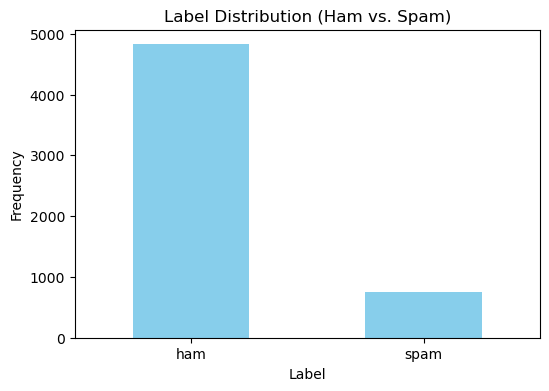

In [25]:
label_counts = data['v1'].value_counts()

plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Label Distribution (Ham vs. Spam)')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


# We visualized the distribution of the length of ham messages and spam messages.
# We notice that ham messages are greater in length than spam messages, which tend to be way shorter.

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

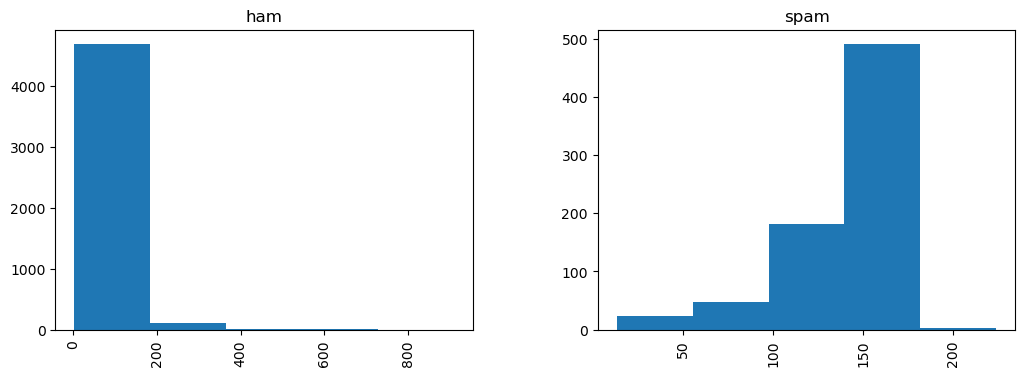

In [26]:
df["length"] = df["v2"].apply(len)
df.sort_values(by='length', ascending=False).head(10)


df.hist(column = 'length', by ='v1',figsize=(12,4), bins = 5)

# Visualizing the frequency of common words in ham and spam messages using word clouds for comparison.

Ham messages common words: Words like want, call, know, love, home, got, time, okay, tell, call later are prominent in the ham message word cloud.

spam messages common words: Words like FREE, text, call, urgent, win, mobile, claim, prize, cash, offer, guaranteed dominate the spam message word cloud.

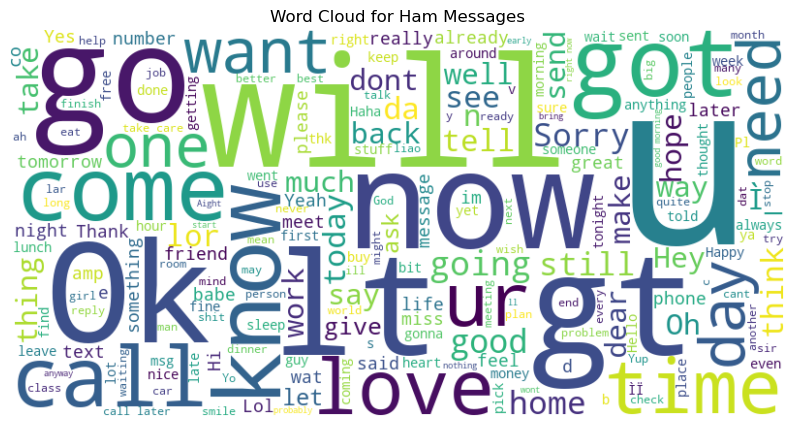

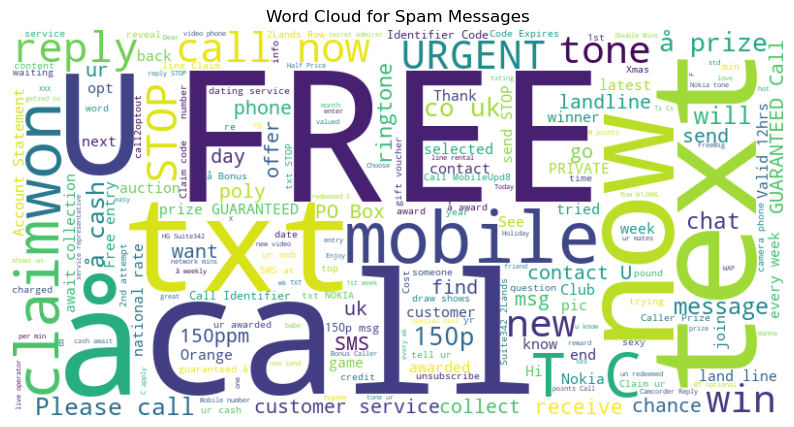

In [ ]:
ham_messages = " ".join(data[data['v1'] == 'ham']['v2'])
spam_messages = " ".join(data[data['v1'] == 'spam']['v2'])

wordcloud_ham = WordCloud(background_color="white", width=800, height=400).generate(ham_messages)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_ham, interpolation="bilinear")
plt.title("Word Cloud for Ham Messages")
plt.axis('off')
plt.show()

wordcloud_spam = WordCloud(background_color="white", width=800, height=400).generate(spam_messages)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_spam, interpolation="bilinear")
plt.title("Word Cloud for Spam Messages")
plt.axis('off')
plt.show()